# Classification Tree
- Baskin Robbins nutritional information: http://www.baskinrobbins.ca/nutritional-information/
- ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)
---

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 0.24.2
numpy   version: 1.16.3
seaborn version: 0.9.0


In [3]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/baskin_robbins_classifier.csv'
df=pd.read_csv(url)
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
Flavour              70 non-null object
Calories             70 non-null int64
Total Fat (g)        70 non-null float64
Trans Fat (g)        70 non-null float64
Carbohydrates (g)    70 non-null int64
Sugars (g)           70 non-null int64
Protein (g)          70 non-null float64
Category             70 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 4.5+ KB


In [5]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')

In [6]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

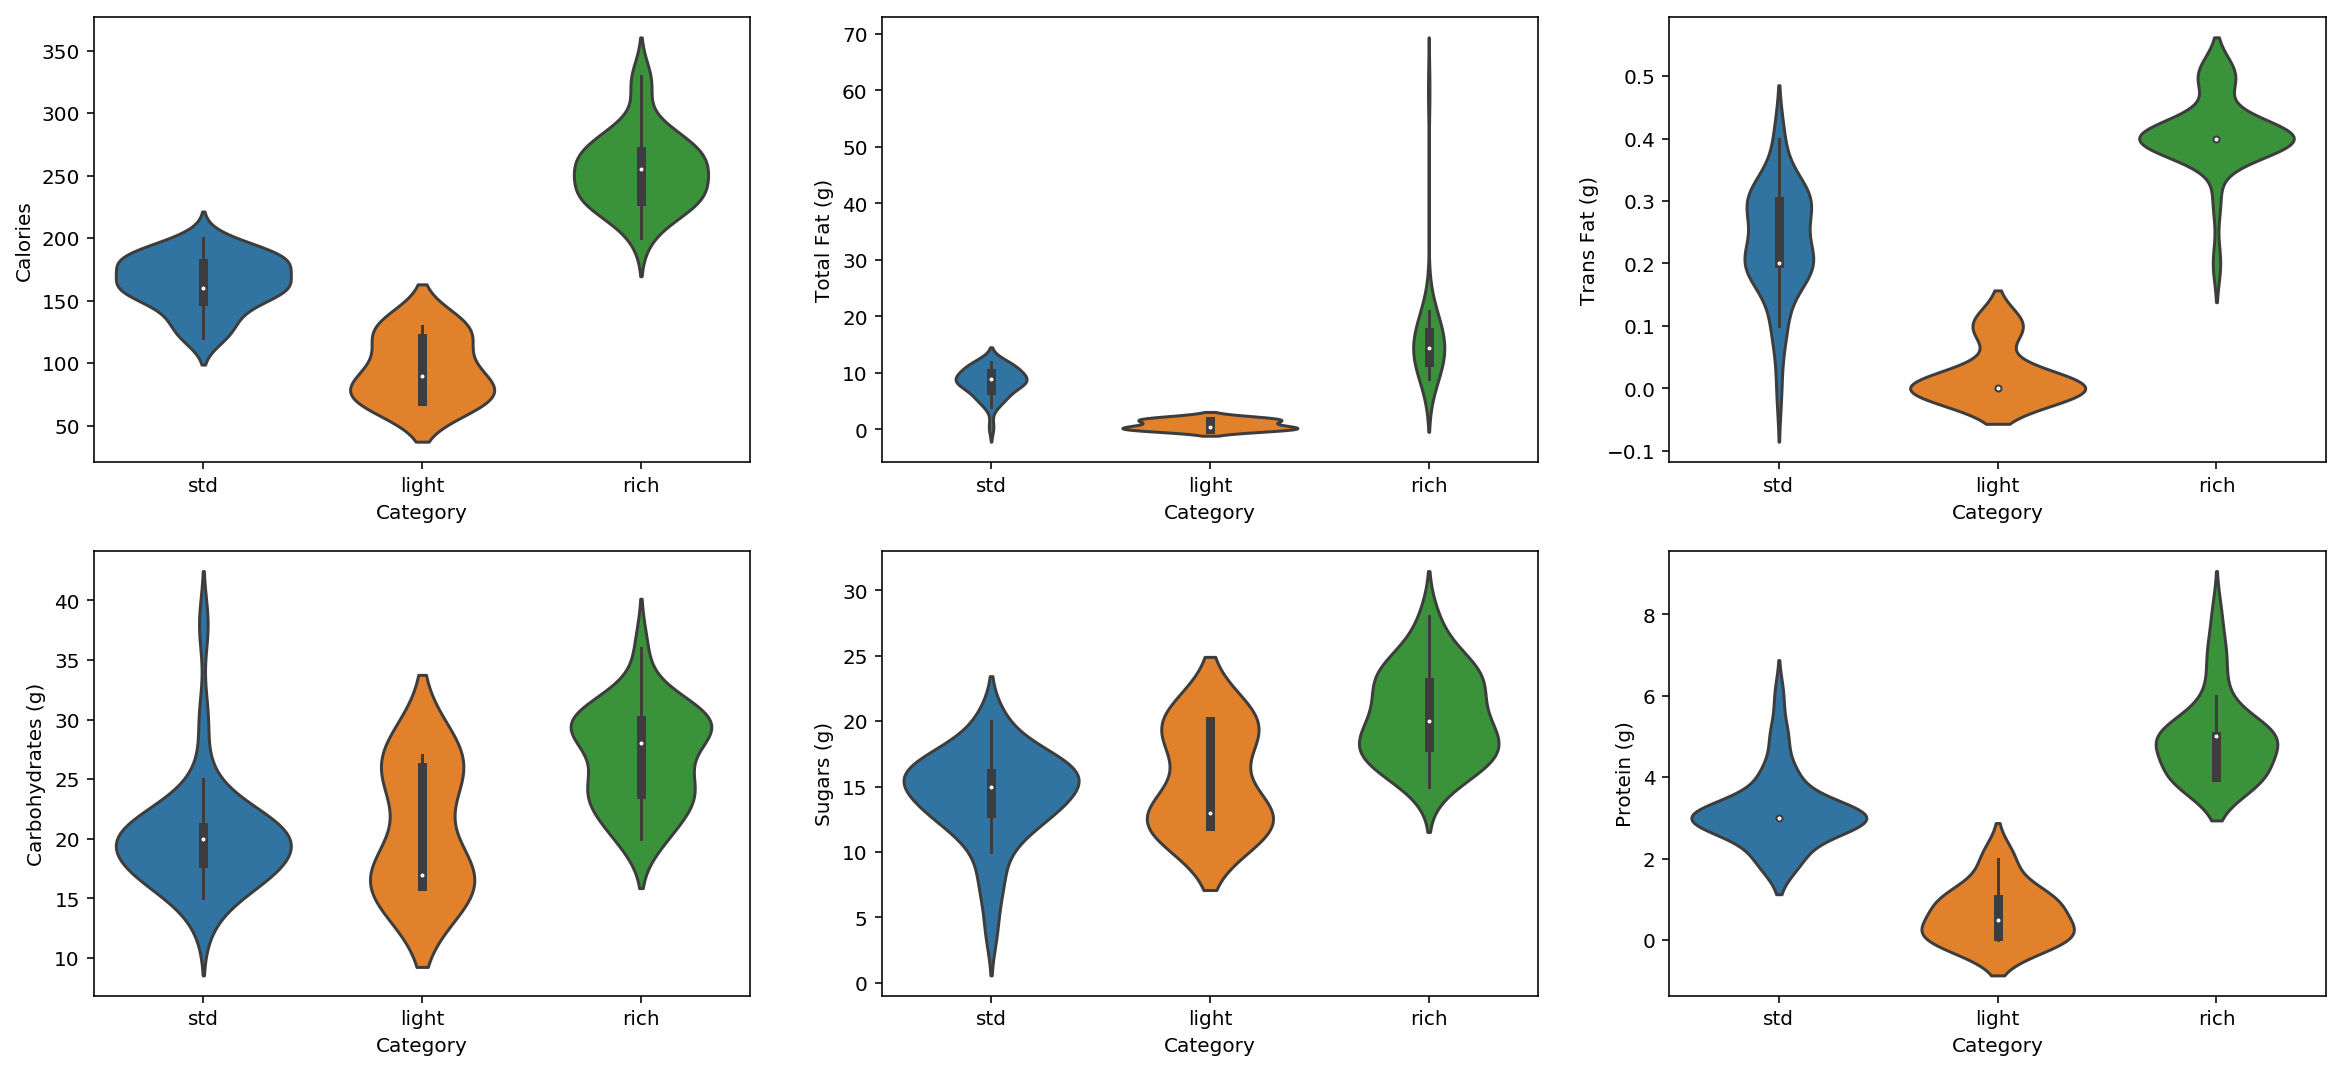

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='Category', y=col, data=df, ax=ax[i])

---

## Draw Decision Tree

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [9]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')

In [10]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

In [11]:
X=df[cols] # features
y=df['Category'] # label

In [12]:
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)

In [13]:
model=DecisionTreeClassifier(criterion='gini') # gini is a default
# model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
X_train.columns

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
       'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [15]:
model.feature_importances_

array([0.62367944, 0.31901352, 0.        , 0.        , 0.05730704,
       0.        ])

In [16]:
fs=pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fs

Calories             0.623679
Total Fat (g)        0.319014
Sugars (g)           0.057307
Protein (g)          0.000000
Carbohydrates (g)    0.000000
Trans Fat (g)        0.000000
dtype: float64

In [17]:
y_train.value_counts()

std      26
rich     23
light     7
Name: Category, dtype: int64

In [18]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

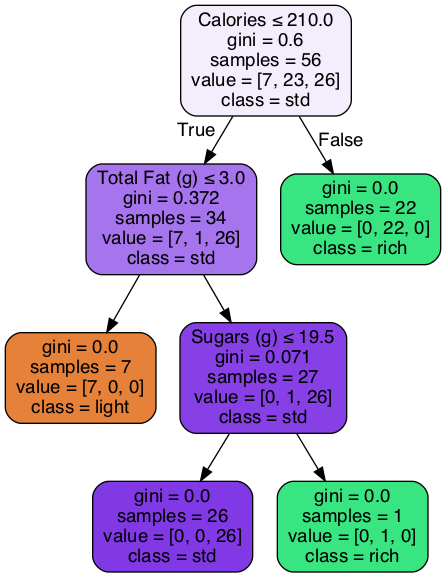

In [19]:
# credit: https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                feature_names=cols,  
                class_names=['light', 'rich', 'std'], 
                filled=True, rounded=True,  
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Gini impurity** is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. ... It reaches its minimum (zero) when all cases in the node fall into a single target category. (https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

In [20]:
model.tree_.impurity # gini

array([0.60012755, 0.37197232, 0.        , 0.07133059, 0.        ,
       0.        , 0.        ])

In [21]:
model.tree_.value

array([[[ 7., 23., 26.]],

       [[ 7.,  1., 26.]],

       [[ 7.,  0.,  0.]],

       [[ 0.,  1., 26.]],

       [[ 0.,  0., 26.]],

       [[ 0.,  1.,  0.]],

       [[ 0., 22.,  0.]]])

In [22]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D

In [23]:
# switch to interactive matplotlib
# %matplotlib qt
# %pylab qt

# switch back to inline mode
%matplotlib inline

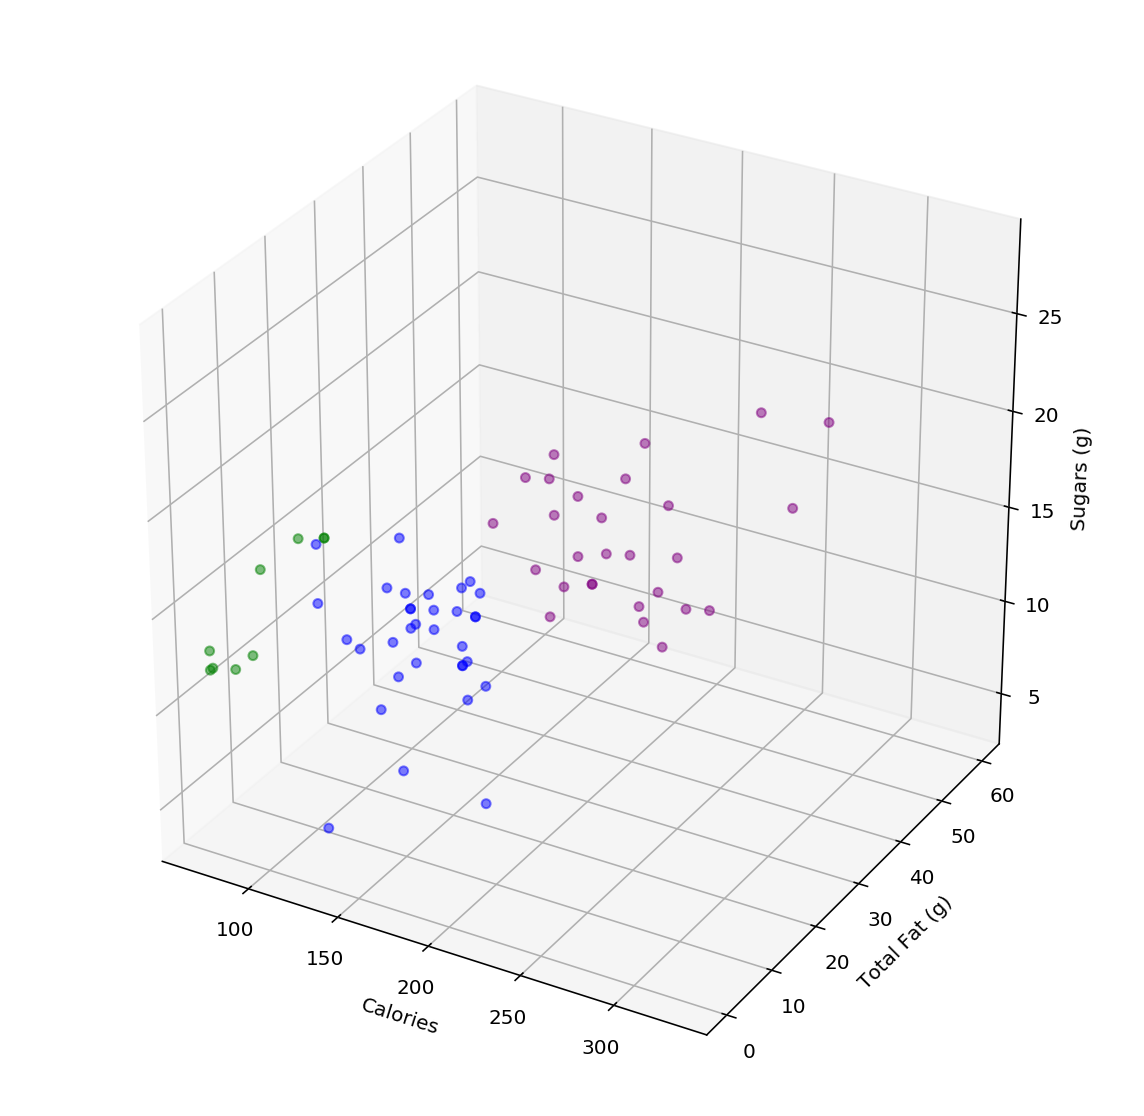

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
colors=y.map({'light': 'green', 'std': 'blue', 'rich': 'purple'})
ax.scatter(X['Calories'], X['Total Fat (g)'], X['Sugars (g)'], alpha=.5, c=colors)
ax.set_xlabel('Calories')
ax.set_ylabel('Total Fat (g)')
ax.set_zlabel('Sugars (g)');

---

In [25]:
predicted = model.predict(X_test)
predicted

array(['light', 'rich', 'std', 'rich', 'rich', 'std', 'std', 'rich',
       'rich', 'light', 'std', 'std', 'light', 'rich'], dtype=object)

In [26]:
pd.crosstab(y_test, predicted)

col_0,light,rich,std
Category,,,
light,2,0,0
rich,0,5,0
std,1,1,5


---